In [241]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns

In [242]:
train=pd.read_csv("train.csv")

test=pd.read_csv("test.csv")


In [243]:
full_data = [train, test]


train['Name_length'] = train['Name'].apply(len)
test['Name_length'] = test['Name'].apply(len)

train['Has_Cabin'] = train["Cabin"].apply(lambda x: 0 if type(x) == float else 1)
test['Has_Cabin'] = test["Cabin"].apply(lambda x: 0 if type(x) == float else 1)

for dataset in full_data:
    dataset['FamilySize'] = dataset['SibSp'] + dataset['Parch'] + 1

for dataset in full_data:
    dataset['IsAlone'] = 0
    dataset.loc[dataset['FamilySize'] == 1, 'IsAlone'] = 1

for dataset in full_data:
    dataset['Embarked'] = dataset['Embarked'].fillna('S')
for dataset in full_data:
    dataset['Age'] = dataset['Age'].fillna(dataset['Age'].mean())

def get_title(name):
    title_search = re.search(' ([A-Za-z]+)\.', name)

    if title_search:
        return title_search.group(1)
    return ""

for dataset in full_data:
    dataset['Title'] = dataset['Name'].apply(get_title)

for dataset in full_data:
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Countess','Capt', 'Col','Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')

    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')

for dataset in full_data:
    
   
    title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5}
    dataset['Title'] = dataset['Title'].map(title_mapping)
    dataset['Title'] = dataset['Title'].fillna(0)
  
 

  
    

In [244]:
dataset.head()
dataset=dataset.drop(columns=['Name','Cabin','Sex','Embarked','Ticket','Fare','Age'])

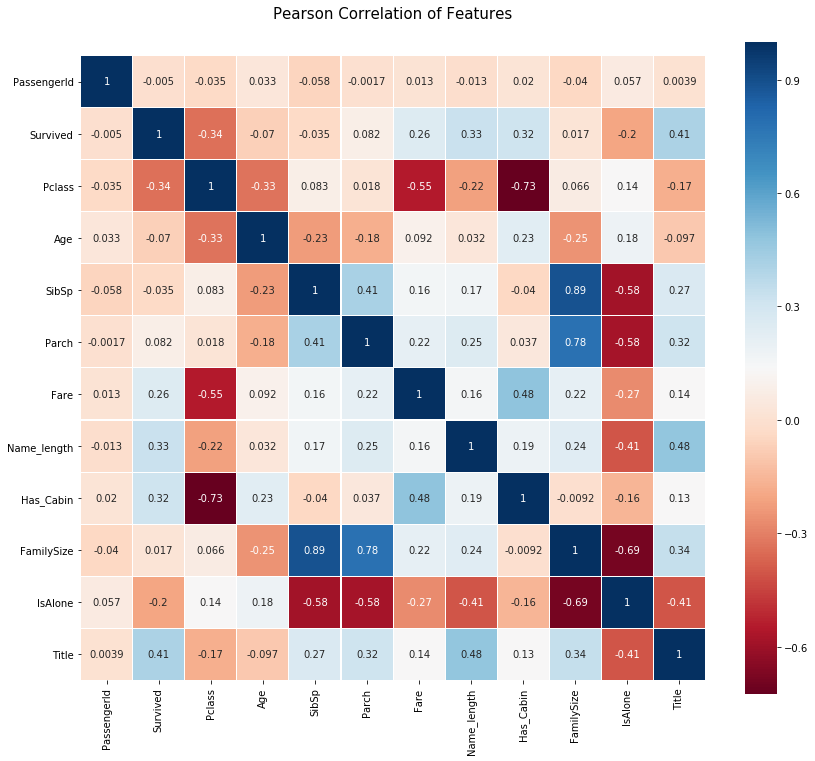

In [245]:
colormap = plt.cm.RdBu
plt.figure(figsize=(14,12))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sns.heatmap(train.corr(),linewidths=0.1,vmax=1.0, 
            square=True, cmap=colormap, linecolor='white', annot=True)

In [246]:
train=train.drop(columns=['Name','Cabin','Sex','Embarked','Ticket','Fare','Age'],axis=1)

train.head()
train.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
SibSp          0
Parch          0
Name_length    0
Has_Cabin      0
FamilySize     0
IsAlone        0
Title          0
dtype: int64

In [247]:
test=test.drop(columns=['Name','Cabin','Sex','Embarked','Ticket','Fare','Age'])
test.head()
test.isnull().sum()

PassengerId    0
Pclass         0
SibSp          0
Parch          0
Name_length    0
Has_Cabin      0
FamilySize     0
IsAlone        0
Title          0
dtype: int64

In [249]:
features=['Pclass', 'SibSp', 'Parch', 'Name_length',
       'Has_Cabin', 'FamilySize', 'IsAlone', 'Title']
X=train[features]
y=train['Survived']


In [250]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)


In [251]:
X_train.head()

,Pclass,SibSp,Parch,Name_length,Has_Cabin,FamilySize,IsAlone,Title
211,2,0,0,26,0,1,1,2
17,2,0,0,28,0,1,1,1
765,1,1,0,36,1,2,0,3
693,3,0,0,16,0,1,1,1
113,3,1,0,23,0,2,0,2


In [252]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import classification_report, confusion_matrix
model = RandomForestClassifier(n_estimators=1000, min_samples_leaf=10, random_state=1)

model.fit(X_train, y_train)

predictions = model.predict(X_test)

print("Random Forrest Accuracy:",metrics.accuracy_score(y_test, predictions))

print("Mean Absoulte Error:", mean_absolute_error(predictions, y_test))

print("Classification Report:\n", classification_report(y_test, predictions))

print("Confusion Matrix:")
df = pd.DataFrame(
    confusion_matrix(y_test, predictions),
    index = [['actual', 'actual'], ['0','1']],
    columns = [['predicted', 'predicted'], ['0','1']])
print(df)

Random Forrest Accuracy: 0.8295964125560538
Mean Absoulte Error: 0.17040358744394618
Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.88      0.86       136
           1       0.80      0.76      0.78        87

   micro avg       0.83      0.83      0.83       223
   macro avg       0.82      0.82      0.82       223
weighted avg       0.83      0.83      0.83       223

Confusion Matrix:
         predicted    
                 0   1
actual 0       119  17
       1        21  66


In [253]:
pred_Test_Set = model.predict(test[features])
pred_Test_Set.size

418

In [254]:
test['Survived'] = pred_Test_Set

In [258]:
togo=['PassengerId','Survived']
testfinal=test[togo]

In [259]:
testfinal.to_csv('TitanicFinal.csv',index=False)

END